# BioActivity Data - BioInformatics project
> This is a notebook about a statistics project using Bioactivity dataset

Reference and thanks to [Youtube course](https://www.youtube.com/watch?v=plVLRashaA8&list=PLtqF5YXg7GLlQJUv9XJ3RWdd5VYGwBHrP&index=1) from Data Professor. This notebook will follow the directions given by the Professor and integrate other concepts found elsewhere, possible end use of ML and SHAP algorithms.

## Configurations

In [2]:
! pip install chembl_webresource_client

## Import Libraries

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from chembl_webresource_client.new_client import new_client

## Download Dataset
> ChEMBL bioactivity data

[Here](https://www.ebi.ac.uk/chembl/) you can find this dataset. Over 2.4M compounds. "It's a database of bioactive molecules with drug-like properties. It brings together chemical, bioactivity and genomic data to aid the translation of genomic information into effective new drugs."

### Target search for "coronavirus"

In [6]:
target = new_client.target 
target_query = target.search('coronavirus')
targets = pd.DataFrame(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],Feline coronavirus,Feline coronavirus,14.0,False,CHEMBL612744,[],ORGANISM,12663
2,[],Murine coronavirus,Murine coronavirus,14.0,False,CHEMBL5209664,[],ORGANISM,694005
3,[],Canine coronavirus,Canine coronavirus,14.0,False,CHEMBL5291668,[],ORGANISM,11153
4,[],Human coronavirus 229E,Human coronavirus 229E,13.0,False,CHEMBL613837,[],ORGANISM,11137
5,[],Human coronavirus OC43,Human coronavirus OC43,13.0,False,CHEMBL5209665,[],ORGANISM,31631
6,[],Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,694009
7,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.0,False,CHEMBL4296578,[],ORGANISM,1335626
8,[],Severe acute respiratory syndrome-related coro...,Replicase polyprotein 1ab,4.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,694009
9,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,4.0,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049


### Target search for "alzheimer"

In [8]:
target_query_alzh = target.search('alzheimer')
targets_alzh = pd.DataFrame(target_query_alzh)
targets_alzh

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Nucleosome-remodeling factor subunit BPTF,13.0,False,CHEMBL3085621,"[{'accession': 'Q12830', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Nicastrin,11.0,False,CHEMBL3418,"[{'accession': 'Q92542', 'component_descriptio...",SINGLE PROTEIN,9606
2,[],Homo sapiens,Gamma-secretase,11.0,False,CHEMBL2094135,"[{'accession': 'Q96BI3', 'component_descriptio...",PROTEIN COMPLEX,9606
3,[],Rattus norvegicus,Amyloid-beta A4 protein,9.0,False,CHEMBL3638365,"[{'accession': 'P08592', 'component_descriptio...",SINGLE PROTEIN,10116
4,[],Mus musculus,Amyloid-beta A4 protein,8.0,False,CHEMBL4523942,"[{'accession': 'P12023', 'component_descriptio...",SINGLE PROTEIN,10090
5,[],Homo sapiens,Amyloid-beta A4 protein,7.0,False,CHEMBL2487,"[{'accession': 'P05067', 'component_descriptio...",SINGLE PROTEIN,9606


### Select and retrive bioactivity data for SARS coronavirus 3c-like proteinase

In [21]:
selected_target = targets.target_chembl_id[targets["pref_name"] == "SARS coronavirus 3C-like proteinase"]
selected_target.values[0]

'CHEMBL3927'

In [ ]:
# Using only one bioactivity unit IC50, inhibitory concentration at 50% is a low concentration (I think for semplicity or good practice)
# "In order to elicit 50% of the inhibition of a target protein you would need a lower concentration of the drug"

activity = new_client.activity
res = activity.filter(target_chembl_id = selected_target.values[0]).filter(standard_type = "IC50")
df = pd.DataFrame.from_dict(res)
df.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,7.2
1,None,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,9.4
2,None,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,13.5
3,None,None,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,13.11
4,None,None,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,None,None,IC50,uM,UO_0000065,None,2.0


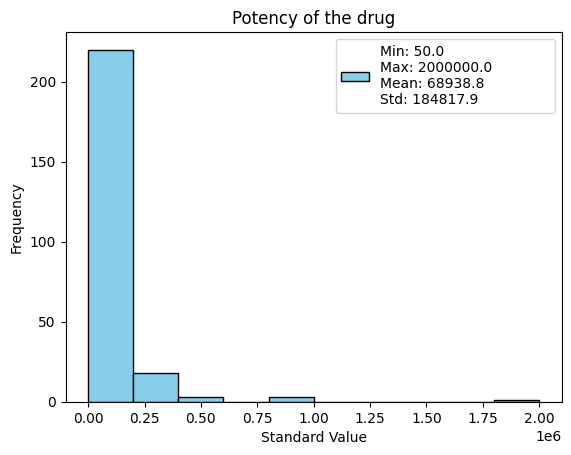

In [ ]:
# standard_value si the potency of the drug, the lower the better the potency of the drug becomes

df["standard_value"].astype(float).plot(kind="hist", 
                                        title="Potency of the drug",
                                        legend=False,
                                        color = "skyblue",
                                        edgecolor = "black")
plt.legend([f'Min: {min(df["standard_value"].astype(float))} \
            \nMax: {max(df["standard_value"].astype(float))} \
            \nMean: {np.mean(df["standard_value"].astype(float)).round(1)} \
            \nStd: {np.std(df["standard_value"].astype(float)).round(1)}'])
plt.xlabel("Standard Value")
plt.ylabel("Frequency")
plt.show()

In [93]:
os.chdir('/Users/silvanoquarto/Desktop/LAVORO/MEDICAL_PHYSICS/Med-Physics/')
os.makedirs("data/CHEMBL_Bioactivity_Data/", exist_ok=True)

df.to_csv("data/CHEMBL_Bioactivity_Data/bioactivity_coronavirus.csv", index=False)

### Select and retrive bioactivity data for Amyloid-beta A4 protein and Homo sapiens

In [19]:
selected_target_alzh = targets_alzh.target_chembl_id[(targets_alzh["pref_name"] == "Amyloid-beta A4 protein") &
                                                      (targets_alzh["organism"] == "Homo sapiens")]
selected_target_alzh.values[0]

'CHEMBL2487'

In [30]:
res_alzh = activity.filter(target_chembl_id = selected_target_alzh.values[0]).filter(standard_type = "IC50")
df_alzh = pd.DataFrame.from_dict(res_alzh)
df_alzh.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,357577,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,5.0
1,None,None,357580,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,2.7
2,None,None,358965,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,1.8
3,None,None,368887,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,11.0
4,None,None,375954,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,None,None,IC50,uM,UO_0000065,None,10.0


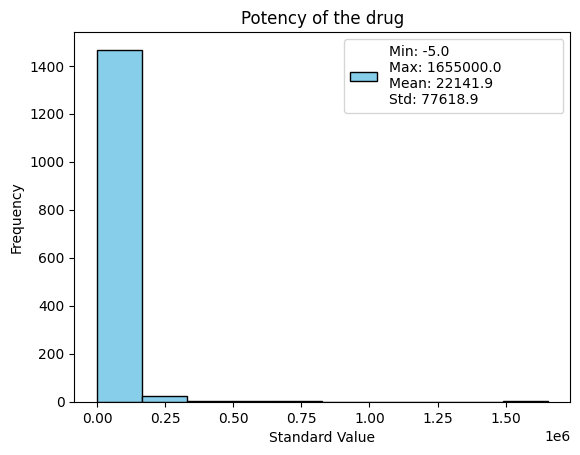

In [78]:
# standard_value si the potency of the drug, the lower the better the potency of the drug becomes

df_alzh["standard_value"].astype(float).plot(kind="hist", 
                                        title="Potency of the drug",
                                        legend=False,
                                        color = "skyblue",
                                        edgecolor = "black")
plt.legend([f'Min: {min(df_alzh["standard_value"].astype(float))} \
            \nMax: {max(df_alzh["standard_value"].astype(float))} \
            \nMean: {np.mean(df_alzh["standard_value"].astype(float)).round(1)} \
            \nStd: {np.std(df_alzh["standard_value"].astype(float)).round(1)}'])
plt.xlabel("Standard Value")
plt.ylabel("Frequency")
plt.show()

In [92]:
os.chdir('/Users/silvanoquarto/Desktop/LAVORO/MEDICAL_PHYSICS/Med-Physics/')
os.makedirs("data/CHEMBL_Bioactivity_Data/", exist_ok=True)

df_alzh.to_csv("data/CHEMBL_Bioactivity_Data/bioactivity_alzheimer.csv", index=False)

## Pre-Processing and Feature Engineering

### CORONAVIRUS dataset

#### Handling Missing Data for Coronavirus

In [112]:
df = pd.read_csv("data/CHEMBL_Bioactivity_Data/bioactivity_coronavirus.csv")
df.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,NaN,NaN,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,NaN,NaN,IC50,uM,UO_0000065,NaN,7.20
1,NaN,NaN,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,NaN,NaN,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,NaN,NaN,IC50,uM,UO_0000065,NaN,9.40
2,NaN,NaN,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,NaN,NaN,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,NaN,NaN,IC50,uM,UO_0000065,NaN,13.50
3,NaN,NaN,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,NaN,NaN,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,NaN,NaN,IC50,uM,UO_0000065,NaN,13.11
4,NaN,NaN,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,NaN,NaN,BAO_0000190,...,Severe acute respiratory syndrome-related coro...,SARS coronavirus 3C-like proteinase,694009,NaN,NaN,IC50,uM,UO_0000065,NaN,2.00


In [113]:
# Check how many NAN values there are for each variable

df.isna().sum()

action_type                  240
activity_comment             245
activity_id                    0
activity_properties            0
assay_chembl_id                0
assay_description              0
assay_type                     0
assay_variant_accession      247
assay_variant_mutation       247
bao_endpoint                   0
bao_format                     0
bao_label                      0
canonical_smiles               0
data_validity_comment        216
data_validity_description    216
document_chembl_id             0
document_journal               0
document_year                  0
ligand_efficiency             48
molecule_chembl_id             0
molecule_pref_name           211
parent_molecule_chembl_id      0
pchembl_value                 48
potential_duplicate            0
qudt_units                     2
record_id                      0
relation                       2
src_id                         0
standard_flag                  0
standard_relation              2
standard_t

In [114]:
df['standard_value'].isna().sum()

np.int64(2)

In [115]:
# Drop all NAN values for standard value

df_2 = df[df['standard_value'].notna()]
df_2.shape

(245, 46)

#### Labelling compounds

The three options are:
1. **active**: compounds with standard values (potency) less than 1000 nM
2. **inactive**: compounds with standard values (potency) greater than 10000 nM
3. **intermediate**: compounds with standard values (potency) between 1000 and 10000 nM

In [141]:
def labelling_coumpounds(standard_value):
    if float(standard_value) <= 1000:
        return "active"
    elif float(standard_value) >= 10000:
        return "inactive"
    else:
        return "intermediate"

bioactivity_class = list(df_2['standard_value'].map(labelling_coumpounds))
bioactivity_class[:10]

['intermediate',
 'intermediate',
 'inactive',
 'inactive',
 'intermediate',
 'active',
 'intermediate',
 'active',
 'inactive',
 'inactive']

In [144]:
# molecule_chembl_id is the id for the single compound
# compound is a molecule, a drug or a chemical structure that produces activity on the TARGET protein (CHEMBL3927)
# There could be more than one identical molecule_chembl_id in the dataset, so we keep one of them for semplicity and no redundancy

mol_cid = list(df_2['molecule_chembl_id'].map(lambda x: x))
mol_cid[:10]

['CHEMBL187579',
 'CHEMBL188487',
 'CHEMBL185698',
 'CHEMBL426082',
 'CHEMBL187717',
 'CHEMBL365134',
 'CHEMBL187598',
 'CHEMBL190743',
 'CHEMBL365469',
 'CHEMBL188983']

In [146]:
canonical_smiles = list(df_2['canonical_smiles'].map(lambda x: x))
canonical_smiles[:10]

['Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21',
 'O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21',
 'O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21',
 'O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21',
 'O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-]',
 'O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21',
 'O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(F)cc21',
 'O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21',
 'O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21',
 'O=C1C(=O)N(C/C=C/c2cc3ccccc3s2)c2ccc(I)cc21']

In [147]:
standard_value = list(df_2['standard_value'].map(lambda x: x))
standard_value[:10]

[7200.0,
 9400.0,
 13500.0,
 13110.0,
 2000.0,
 980.0,
 4820.0,
 950.0,
 11200.0,
 23500.0]

In [153]:
# Combine the 4 lists into a DF

df_3 = pd.DataFrame(list(zip(mol_cid, canonical_smiles, bioactivity_class, standard_value)),
                    columns=["molecule_chembl_id", "canonical_smiles", "bioactivity_class", "standard_value"])
df_3.head()

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,2000.0


In [155]:
df_3.to_csv("data/CHEMBL_Bioactivity_Data/bioactivity_coronavirus_preprocessed.csv", index=False)

### ALZHEIMER dataset

#### Handling Missing Data for Alzheimer

In [117]:
df_alzh = pd.read_csv("data/CHEMBL_Bioactivity_Data/bioactivity_alzheimer.csv")
df_alzh.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,357577,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,5.0
1,NaN,NaN,357580,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,2.7
2,NaN,NaN,358965,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,1.8
3,NaN,NaN,368887,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,11.0
4,NaN,NaN,375954,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Amyloid-beta A4 protein,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,10.0


In [118]:
# Check how many NAN values there are for each variable

df_alzh.isna().sum()

action_type                  1371
activity_comment             1342
activity_id                     0
activity_properties             0
assay_chembl_id                 0
assay_description               0
assay_type                      0
assay_variant_accession      1720
assay_variant_mutation       1720
bao_endpoint                    0
bao_format                      0
bao_label                       0
canonical_smiles                0
data_validity_comment        1668
data_validity_description    1668
document_chembl_id              0
document_journal              157
document_year                   0
ligand_efficiency             487
molecule_chembl_id              0
molecule_pref_name           1551
parent_molecule_chembl_id       0
pchembl_value                 450
potential_duplicate             0
qudt_units                    190
record_id                       0
relation                      222
src_id                          0
standard_flag                   0
standard_relat

In [119]:
df_alzh['standard_value'].isna().sum()

np.int64(222)

In [120]:
# Drop all NAN values for standard value

df_alzh_2 = df_alzh[df_alzh['standard_value'].notna()]
df_alzh_2.shape

(1498, 46)

#### Labelling compounds

The three options are:
1. **active**: compounds with standard values (potency) less than 1000 nM
2. **inactive**: compounds with standard values (potency) greater than 10000 nM
3. **intermediate**: compounds with standard values (potency) between 1000 and 10000 nM

In [143]:
def labelling_coumpounds(standard_value):
    if float(standard_value) <= 1000:
        return "active"
    elif float(standard_value) >= 10000:
        return "inactive"
    else:
        return "intermediate"

bioactivity_class_alzh = list(df_alzh_2['standard_value'].map(labelling_coumpounds))
bioactivity_class_alzh[:10]

['intermediate',
 'intermediate',
 'intermediate',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive',
 'inactive']

In [145]:
# molecule_chembl_id is the id for the single compound
# compound is a molecule, a drug or a chemical structure that produces activity on the TARGET protein (CHEMBL2487)
# There could be more than one identical molecule_chembl_id in the dataset, so we keep one of them for semplicity and no redundancy

mol_cid_alzh = list(df_alzh_2['molecule_chembl_id'].map(lambda x: x))
mol_cid_alzh[:10]

['CHEMBL311039',
 'CHEMBL450926',
 'CHEMBL310242',
 'CHEMBL74874',
 'CHEMBL75183',
 'CHEMBL563',
 'CHEMBL196279',
 'CHEMBL195970',
 'CHEMBL195970',
 'CHEMBL264006']

In [148]:
canonical_smiles_alzh = list(df_alzh_2['canonical_smiles'].map(lambda x: x))
canonical_smiles_alzh[:10]

['CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1',
 'CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1',
 'CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(F)cc1',
 'CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(Cl)cc1',
 'CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(Br)cc1',
 'CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1',
 'CC(C(=O)O)c1ccc(-c2ccc(Cl)c(Cl)c2)c(F)c1',
 'CC(C(=O)O)c1ccc(-c2cc(Cl)cc(Cl)c2)c(F)c1',
 'CC(C(=O)O)c1ccc(-c2cc(Cl)cc(Cl)c2)c(F)c1',
 'CC(C(=O)O)c1ccc(-c2ccc(C3CCCCC3)cc2)c(F)c1']

In [149]:
standard_value_alzh = list(df_alzh_2['standard_value'].map(lambda x: x))
standard_value_alzh[:10]

[5000.0,
 2700.0,
 1800.0,
 11000.0,
 10000.0,
 305000.0,
 75000.0,
 77000.0,
 94000.0,
 21000.0]

In [154]:
# Combine the 4 lists into a DF

df_3_alzh = pd.DataFrame(list(zip(mol_cid_alzh, canonical_smiles_alzh, bioactivity_class_alzh, standard_value_alzh)),
                    columns=["molecule_chembl_id", "canonical_smiles", "bioactivity_class", "standard_value"])
df_3_alzh.head()

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermediate,5000.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermediate,2700.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermediate,1800.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,11000.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,10000.0


In [156]:
df_3_alzh.to_csv("data/CHEMBL_Bioactivity_Data/bioactivity_alzheimer_preprocessed.csv", index=False)